In [39]:
# K-Means

# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [77]:
# Importer le dataset + selection des variables numériques => la kmeans se fait plus avec des variables numeriques
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, 2:4].values
#X = dataset.iloc[:, 2:5].values

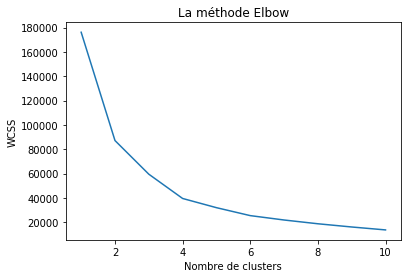

In [79]:
# Utiliser la méthode elbow (= methode du coude) pour trouver le nombre optimal de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
# Construction du modèle : on tente une typologie à 4 classes
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

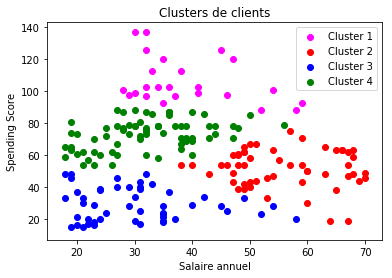

In [81]:
# Visualiser les résultats via un nuage de points
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'green', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'cyan', label = 'Cluster 5')

plt.title('Clusters de clients')
plt.xlabel('Salaire annuel')
plt.ylabel('Spending Score')
plt.legend()

In [84]:
# on recupere la classe des groupes, on l'ajoute à notre jeu de données puis on decrit les classes
labels2 = kmeans.predict(X)
dataset['cluster1'] = labels2
segments = dataset.groupby('cluster1')
segments.describe()

Age                                                      \
         count       mean       std   min   25%   50%    75%   max   
cluster1                                                             
0         24.0  39.000000  9.320384  28.0  32.0  35.5  45.25  59.0   
1         54.0  55.814815  8.752518  38.0  49.0  54.0  64.75  70.0   
2         49.0  30.346939  9.999065  18.0  22.0  30.0  35.00  58.0   
3         73.0  31.958904  8.678579  18.0  26.0  32.0  38.00  56.0   

         Annual Income (k$)              ...  CustomerID         \
                      count        mean  ...         75%    max   
cluster1                                 ...                      
0                      24.0  106.500000  ...      194.25  200.0   
1                      54.0   51.777778  ...      101.25  141.0   
2                      49.0   29.265306  ...       42.00   70.0   
3                      73.0   72.958904  ...      158.00  178.0   

         Spending Score (1-100)                                          \
                          count       mean        std  min    25%   50%   
cluster1                                                                  
0                          24.0  48.833333  33.031825  8.0  16.75  35.5   
1                          54.0  44.092593  14.837826  3.0  42.25  48.0   
2                          49.0  54.693878  27.127173  5.0  35.00  59.0   
3                          73.0  52.150685  28.208387  1.0  34.00  52.0   

                       
            75%   max  
cluster1               
0         83.50  97.0  
1         52.75  60.0  
2         76.00  99.0  
3         75.00  97.0  

[4 rows x 32 columns]

In [58]:
# Affichage de la matrice envoyée dans la kmeans juste pour verification
print(X)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

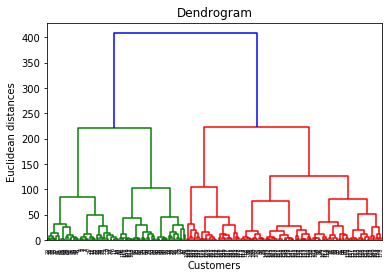

<Figure size 432x288 with 0 Axes>

In [85]:
# Test d'une 2eme technique permettant de choisir le nombre de classe : dendrogramme pour trouver le nb optimal de classes
plt.figure(1)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
plt.savefig('foo1.png')


In [28]:
# 2eme test de realisation d'une kmeans
clustering_method = KMeans(n_clusters = 3, random_state = 9999)
clustering_method.fit(X)
labels = clustering_method.predict(X)


In [86]:
# Affecter la classe au jeu de données
dataset['cluster'] = labels

In [87]:
segments = dataset.groupby('cluster')

In [88]:
segments.describe()

Age                                                        \
        count       mean        std   min    25%   50%    75%   max   
cluster                                                               
0        47.0  42.957447  12.217161  19.0  35.50  44.0  52.00  67.0   
1        62.0  29.564516   5.883071  18.0  24.25  30.0  33.75  40.0   
2        91.0  43.054945  15.672596  18.0  30.00  45.0  54.00  70.0   

        Annual Income (k$)            ...  Spending Score (1-100)        \
                     count       mean ...                     75%   max   
cluster                               ...                                 
0                     47.0  67.191489 ...                   20.00  31.0   
1                     62.0  64.661290 ...                   89.75  99.0   
2                     91.0  54.340659 ...                   54.50  61.0   

        cluster1                                               
           count      mean       std  min  25%  50%  75%  max  
cluster                                                        
0           47.0  1.765957  1.201679  0.0  1.0  2.0  3.0  3.0  
1           62.0  2.096774  1.082039  0.0  2.0  2.0  3.0  3.0  
2           91.0  1.736264  0.916941  0.0  1.0  1.0  3.0  3.0  

[3 rows x 40 columns]